Pixeltests School Data Science, Unit 2_

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [1]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders

 
# Sprint Challenge: Predict Steph Curry's Shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts from October 2009 through June 2019 (regular season and playoffs). The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

You'll create a model to predict whether Curry will make a shot based on his past perfomance.

# Directions

This notebook contains 10 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Importing data.
- **Task 2:** Feature engineering.
- **Task 3:** Splitting data into a feature matrix and target vector.
- **Task 4:** Splitting data into training, validation, and test sets.
- **Task 5:** Establishing baseline accuracy.
- **Task 6:** Building a model with a transformer and a tree-based predictor.
- **Task 7:** Calculating training and validation accuracy.
- **Task 8 (`stretch goal`):** Tuning model hyperparameters.
- **Task 9:** Calculating precision and recall from a confusion matrix.
- **Task 10 (`stretch goal`):** Plotting a confusion matrix.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise 
NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn`



# I. Wrangle Data

**Task 1:** Change the code below to import your dataset. Be sure to examine the columns carefully and determine if one of them should be set at the index. 

In [2]:
'''T1. Import DataFrame `df`'''

import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)
# YOUR CODE HERE


In [3]:
type(df.index)

pandas.core.indexes.range.RangeIndex

**Task 1 Testing**

In [4]:
'''T1 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 13958, 'Is `df` the correct length?'


In [5]:
df.head(2)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0


**Task 2a:** Engineer at least 1 new feature. You can use something from the list below or your own idea.

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**Task 2b (`stretch goal — optional`):** Create a total of 3 new features, using your own ideas or the list above. Make sure you're not just duplicating features that are already in the feature matrix.

1.Yes.The home team is Golden State Warriors because they are the majority.
2.The opponent team is HOU.


1.Yes..Because most of them are GSW.
2.

In [6]:
"""T2. Create new feature"""

df['total seconds']=df['minutes_remaining']+60*df['seconds_remaining']

**Task 2 Test**

In [7]:
df['total_game_remaining']=12*60*(4-df['period'])

In [8]:
def previous_shot(x):
  if x==1:
    x.replace()
  else:
    x.replace(False)


In [13]:
df['shot_made_successful']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
13953    1.0
13954    1.0
13955    0.0
13956    0.0
13957    0.0
Name: shot_made_successful, Length: 13958, dtype: float64

In [12]:
df['shot_made_successful'].fillna(0,inplace=True)

In [11]:
df['shot_made_successful']=df['shot_made_flag'].shift(1)
df['shot_made_successful']

0        NaN
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
13953    1.0
13954    1.0
13955    0.0
13956    0.0
13957    0.0
Name: shot_made_successful, Length: 13958, dtype: float64

In [14]:
'''T2 Testing'''

assert df.shape[1] >= 20, '`df` does not appear to have new features.'


# II. Split Data

**Task 3:** Divide the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `'shot_made_flag'`.

In [61]:
'''T3. Create `X` and `y`.'''
# YOUR CODE HERE
target='shot_made_flag'
X=df.drop('shot_made_flag',axis=1)
y=df[target]
X.shape

(13958, 21)

**Task 3 Test**

In [16]:
'''T3 Tests'''

assert y.shape == (13958,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert len(X) == 13958, '`X` has the wrong number of rows.'
assert X.shape[1] > 1, '`X` has the wrong number of columns'
assert 'shot_made_flag' not in X.columns, 'Target is still part of feature matrix.' 

**Task 4:** Divide your dataset into training, validation, and test sets. 

- Your training set (`X_train`, `y_train`) should contain games from the 2009-10 season through the end of the 2016-17 season.
- Your validation set (`X_val`, `y_val`) should contain games from the 2017-18 season.
- Your test set (`X_test`, `y_test`) should contain games from the 2018-2019 season.
- **Tip:** The NBA season begins in October and ends in June.

In [19]:
'''T4. Create training and val'''
# YOUR CODE HERE



TypeError: ignored

In [20]:
df['game_date']=pd.to_datetime(df['game_date'],infer_datetime_format=True)
df.dtypes

game_id                             int64
game_event_id                       int64
player_name                        object
period                              int64
minutes_remaining                   int64
seconds_remaining                   int64
action_type                        object
shot_type                          object
shot_zone_basic                    object
shot_zone_area                     object
shot_zone_range                    object
shot_distance                       int64
loc_x                               int64
loc_y                               int64
shot_made_flag                      int64
game_date                  datetime64[ns]
htm                                object
vtm                                object
season_type                        object
scoremargin_before_shot           float64
total seconds                       int64
total_game_remaining                int64
shot_made_successful              float64
dtype: object

In [24]:
#df.set_index('game_date',inplace=True)
df.sort_index()
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,...,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,total seconds,total_game_remaining,shot_made_successful
game_date,,,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),...,99,249,0,GSW,HOU,Regular Season,2.0,1511,2160,0.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,-122,145,1,GSW,HOU,Regular Season,0.0,1869,2160,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),...,-60,129,0,GSW,HOU,Regular Season,-4.0,126,2160,1.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),...,-172,82,0,GSW,HOU,Regular Season,-4.0,2949,1440,0.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),...,-68,148,0,GSW,HOU,Regular Season,0.0,1142,1440,0.0


In [33]:
train=df['2009-01-01':'2017-06-30']
val=df['2017-07-01':'2018-06-30']
test=df['2018-07-01':]

In [36]:
train.shape,val.shape,test.shape

((11081, 22), (1168, 22), (1709, 22))

In [62]:
X_train=train.drop('shot_made_flag',axis=1)
y_train=train['shot_made_flag']
X_val=val.drop('shot_made_flag',axis=1)
y_val=val['shot_made_flag']
X_test=test.drop('shot_made_flag',axis=1)
y_test=test['shot_made_flag']
X_test.shape,y_test.shape

((1709, 21), (1709,))

**Test 4**

In [58]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 11081
assert len(X_val) == len(y_val) == 1168
assert len(X_test) == len(y_test) == 1709


# III. Establish Baseline

**Task 5:** Establish the baseline accuracy score for this classification problem using your training set. Save the score to the variable `baseline_acc`.

In [38]:
'''T5. Calculate baseline accuracy `baseline_acc`.'''
from sklearn.metrics import accuracy_score
import numpy as np
baseline_pred=0
y_pred=pd.DataFrame(np.zeros(len(X_train),),dtype=int)
baseline_acc=accuracy_score(y_pred,y_train)
# YOUR CODE HERE
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5272087356736757


**Task 5 Testing**

In [39]:
'''T5 Testing'''

assert isinstance(baseline_acc, float)
assert 0.0 <= baseline_acc <= 1.0


# IV. Build Model

**Task 6:** Build a model that includes (1) a transformer for categorical features and (2) a tree-based predictor. You should combine these two components (and any other pieces you think are necessary) in a pipeline named `model`. Be sure to fit your model to your training data.

In [43]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#build a pipeline for a ransom forest
model = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'), StandardScaler(), 

    RandomForestClassifier(n_jobs=-1, random_state=41)
)

#fit on train, and score on val 
model.fit(X_train, y_train)
print('val accuracy is', model.score(X_val, y_val))


val accuracy is 0.6018835616438356


**Task 6 Testing**

In [44]:
'''T6 Testing'''

from sklearn.pipeline import Pipeline
assert isinstance(model, Pipeline), '`model` should be type `Pipeline`.'

# Does `model` Pipeline have multiple components?
assert len(model.named_steps.keys()) > 1, '`model` should have more than one component.'

# Has `model` been trained?
assert hasattr(model, 'classes_'), 'Have you trained `model`?'


# V. Check Metrics

**Task 7:** Check the training and validation accuracy of your model, and assign the scores to `train_acc` and `val_acc` respectively.

In [45]:
'''T7. Calculate train and test accuracy.'''

# YOUR CODE HERE
train_acc=accuracy_score(model.predict(X_train),y_train)
val_acc=accuracy_score(model.predict(X_val),y_val)
print('Training Accuracy Score:', train_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 1.0
Validation Accuracy Score: 0.6018835616438356


**Task 7 Test**

In [46]:
'''T7 Testing'''

# Is `training_acc` a float between 0.0 and 1.0?
assert isinstance(train_acc, float)
assert 0.0 <= train_acc <= 1.0

# Is `validation_acc` a float between 0.0 and 1.0?
assert isinstance(val_acc, float)
assert 0.0 <= val_acc <= 1.0


# VI. Tune Model

**Task 8 (`stretch goal — optional`):** Using your training and validation sets as a guide, tune the hyperparameters of your model to see if you can improve its accuracy. You can perform your tuning "by hand" or using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

- Important hyperparameters for all tree-based models: `max_depth`.
- Important hyperparameters for random forest models: `n_estimators`, `max_samples`. 
- Important hyperparametes for gradient boosting tree models: `n_estimators`, `learning_rate`.
- **TIP:** If you use `RandomizedSearchCV`, set `n_iter` to `3`. Any larger and the auto-grader will stop working.
- **TIP:** Since you already created a validation set above, there is no need to do k-fold cross-validation here. Set `cv` to `None`.

Once you're satisfied with your model's performance on the validation set (if you can get above `0.6`, you're doing good), calculate its accuracy with your test set. Assign the result to `test_acc`.

In [64]:
'''T8. Tune model.'''

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score


# If you're on Colab, decrease n_iter & cv parameters
from sklearn.ensemble import RandomForestClassifier
clf_rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(random_state=42)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__bootstrap':[True,False]}

# If you're on Colab, decrease n_iter & cv parameters


search = RandomizedSearchCV(
    clf_rf, 
    param_distributions=param_distributions, 
    n_iter=3, 
    cv=None, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train,y_train);

print('Hyperparameters',search.best_params_)
print('Validation Score',search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Hyperparameters {'simpleimputer__strategy': 'mean', 'randomforestclassifier__bootstrap': True}
Validation Score 0.6330648956455612


**Task 8 Testing**

In [ ]:
'''T8 Testing'''
assert isinstance(test_acc, float)
assert 0.0 <= test_acc <= 1.0

# VII. Communication

**Task 9:** Below is a confusion matrix for the model that your instructor made for this challenge (based on the **test data**). Calculate the precision and recall of this model, naming them `instructor_precision` and `instructor_recall`, respectively.

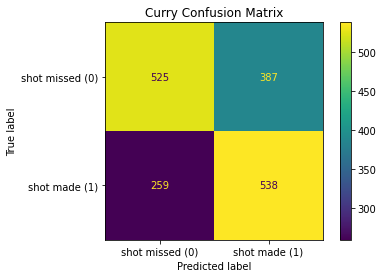

In [54]:
'''T9. Calculate precision and recall'''
# YOUR CODE HERE
shot_made=538
total_shots=538+387
instructor_precision=shot_made/total_shots
print('Instuctor model precision', instructor_precision)
total_positives_negatives=259+538
instructor_recall=shot_made/total_positives_negatives
print('Instuctor model recall', instructor_recall)
print('Instuctor model precision', instructor_precision)
print('Instuctor model recall', instructor_recall)

Instuctor model precision 0.5816216216216217
Instuctor model recall 0.6750313676286073
Instuctor model precision 0.5816216216216217
Instuctor model recall 0.6750313676286073


**Task 9 Testing**

In [55]:
'''T9 Testing'''
assert isinstance(instructor_precision, float)
assert isinstance(instructor_recall, float)
assert 0 <= instructor_precision <= 1
assert 0 <= instructor_recall <= 1

**Task 10 (`stretch goal — optional`):** Plot confusion matrix for your model using your **test data**. Does your model have higher recall or higher precision? How does your model's metrics compare to the metrics you calculated above?

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


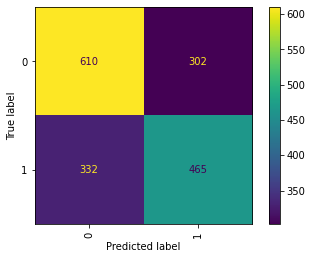

In [65]:
'''T10. Plot ROC curve.'''
# YOUR CODE HERE
from sklearn.metrics import plot_confusion_matrix # Classification matrix
plot_confusion_matrix(search, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       912
           1       0.61      0.58      0.59       797

    accuracy                           0.63      1709
   macro avg       0.63      0.63      0.63      1709
weighted avg       0.63      0.63      0.63      1709

